In [370]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [371]:
df=pd.read_csv("/kaggle/input/body-fat-prediction-dataset/bodyfat.csv")

In [372]:
df.head()

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7

In [373]:
df.shape

(252, 15)

In [374]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [376]:
df.describe()

Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794   44.884921  178.924405   70.148810   37.992063   
std      0.019031    8.368740   12.602040   29.389160    3.662856    2.430913   
min      0.995000    0.000000   22.000000  118.500000   29.500000   31.100000   
25%      1.041400   12.475000   35.750000  159.000000   68.250000   36.400000   
50%      1.054900   19.200000   43.000000  176.500000   70.000000   38.000000   
75%      1.070400   25.300000   54.000000  197.000000   72.250000   39.425000   
max      1.108900   47.500000   81.000000  363.150000   77.750000   51.200000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   100.824206   92.555952   99.904762   59.405952   38.590476   23.102381   
std      8.430476   10.783077    7.164058    5.249952    2.411805    1.694893   
min     79.300000   69.400000   85.000000   47.200000   33.000000   19.100000   
25%     94.350000   84.575000   95.500000   56.000000   36.975000   22.000000   
50%     99.650000   90.950000   99.300000   59.000000   38.500000   22.800000   
75%    105.375000   99.325000  103.525000   62.350000   39.925000   24.000000   
max    136.200000  148.100000  147.700000   87.300000   49.100000   33.900000   

           Biceps     Forearm       Wrist  
count  252.000000  252.000000  252.000000  
mean    32.273413   28.663889   18.229762  
std      3.021274    2.020691    0.933585  
min     24.800000   21.000000   15.800000  
25%     30.200000   27.300000   17.600000  
50%     32.050000   28.700000   18.300000  
75%     34.325000   30.000000   18.800000  
max     45.000000   34.900000   21.400000

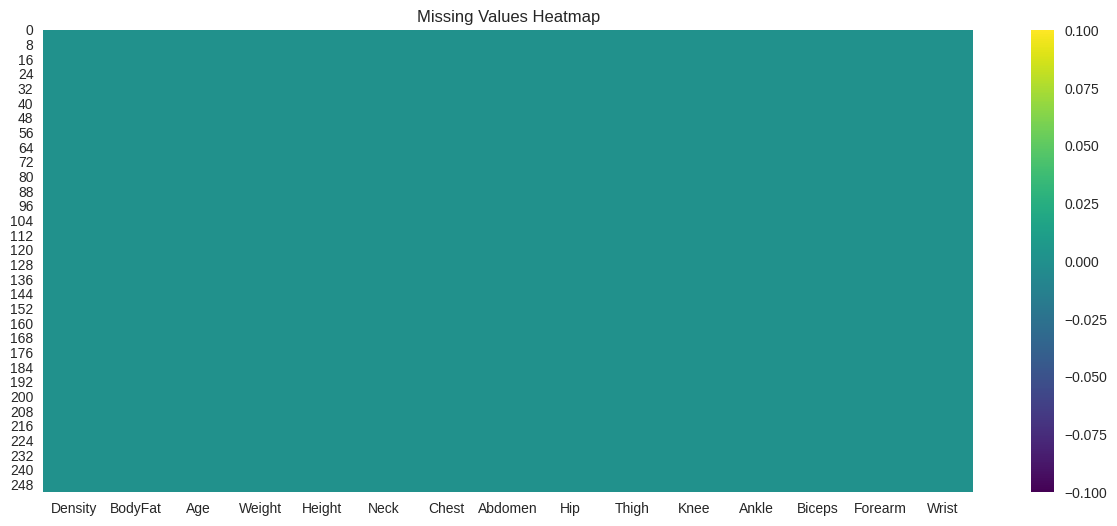

In [377]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

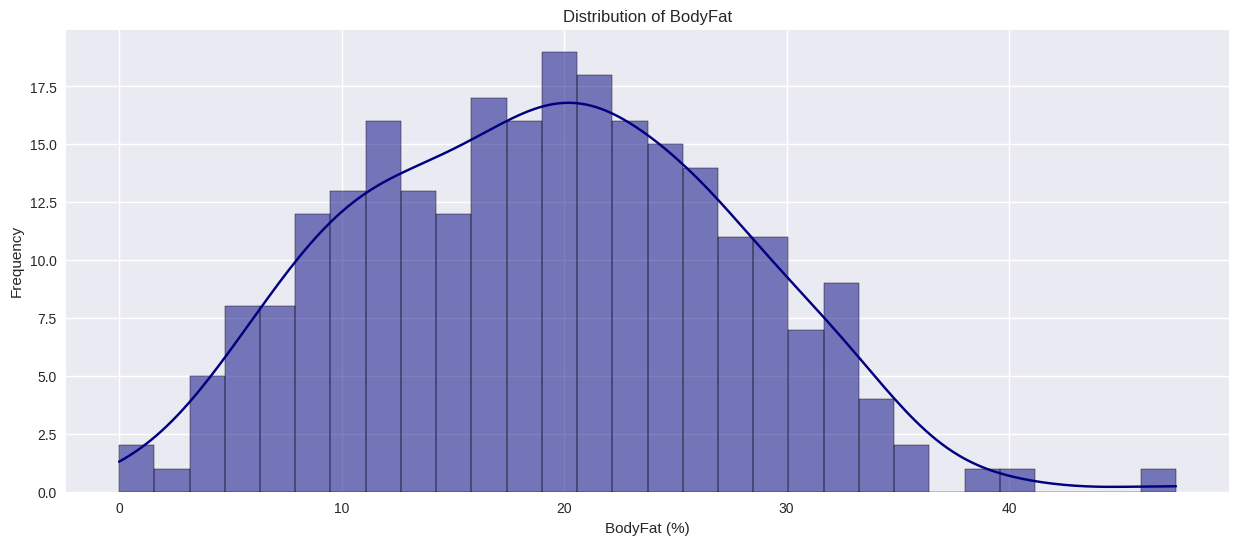

In [378]:
plt.figure(figsize=(15, 6))
sns.histplot(df['BodyFat'], kde=True, bins=30,color="navy")
plt.title('Distribution of BodyFat')
plt.xlabel('BodyFat (%)')
plt.ylabel('Frequency')
plt.show()

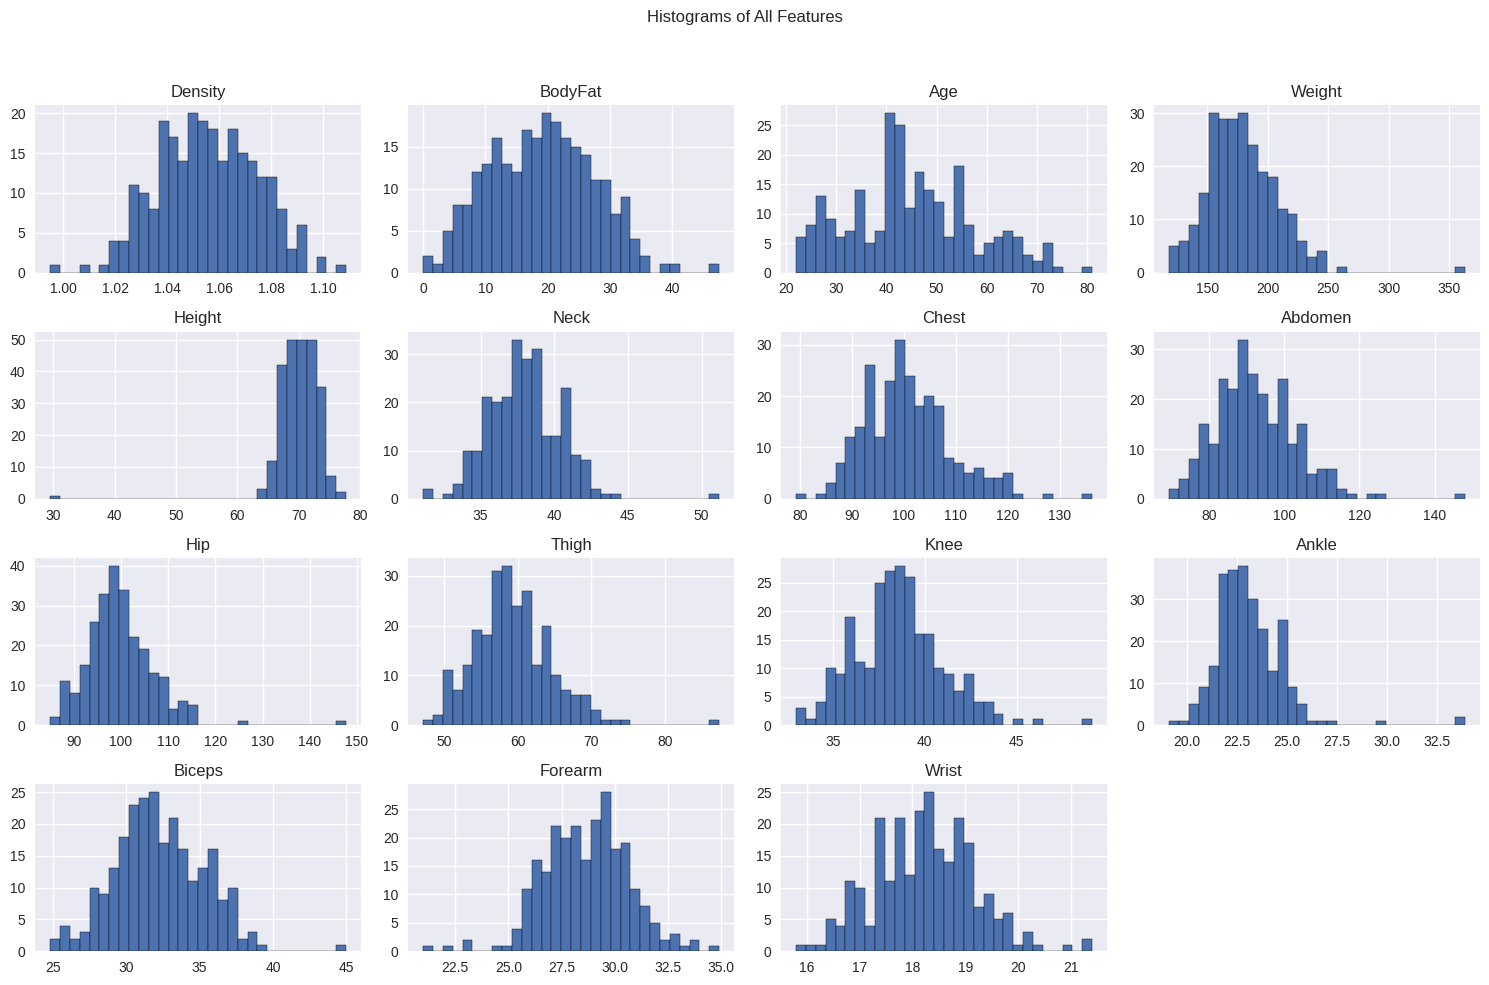

In [379]:
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of All Features')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

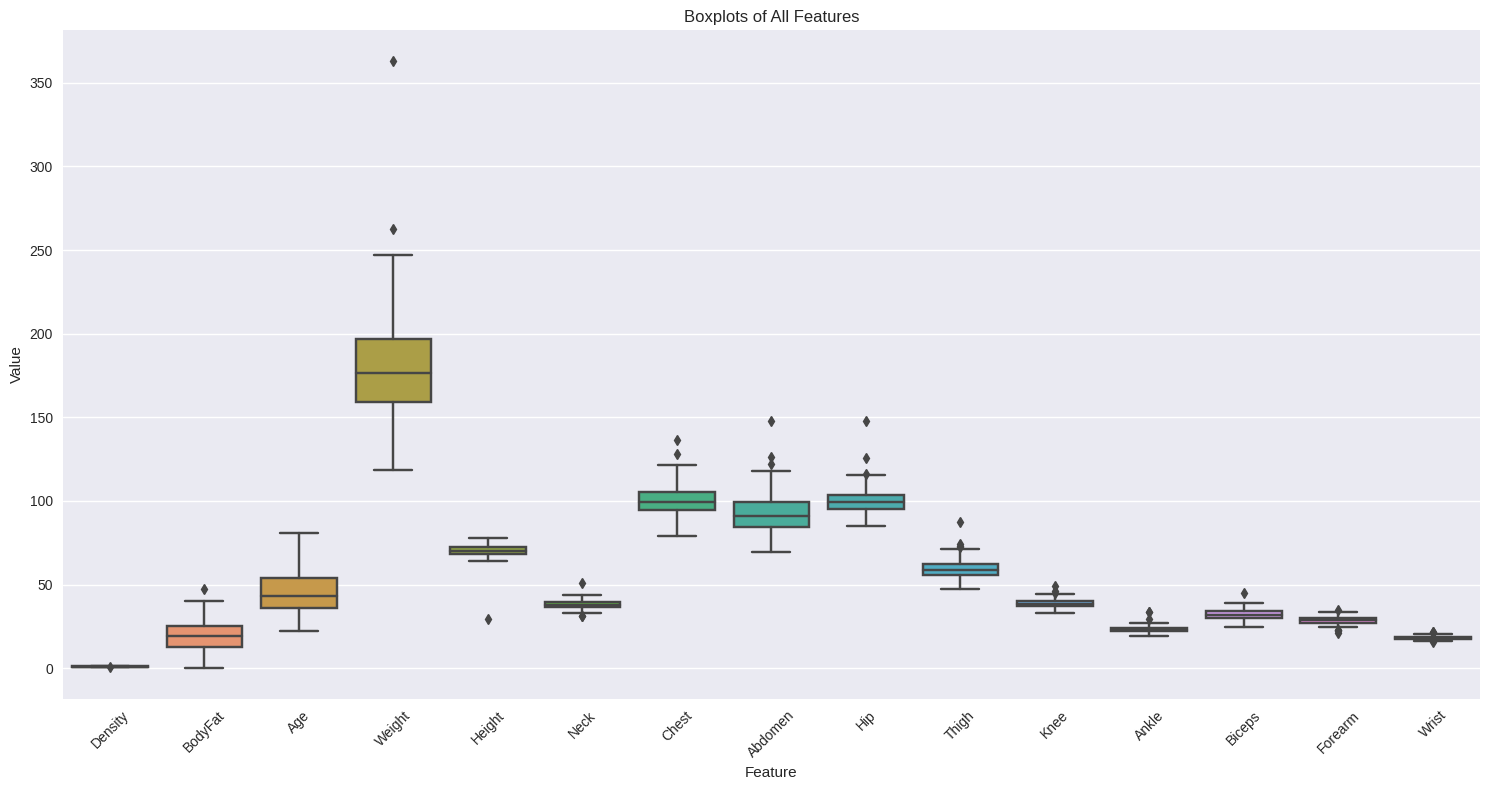

In [380]:
df_melted = df.melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(15, 8))
sns.boxplot(x='Feature', y='Value', data=df_melted)
plt.title('Boxplots of All Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

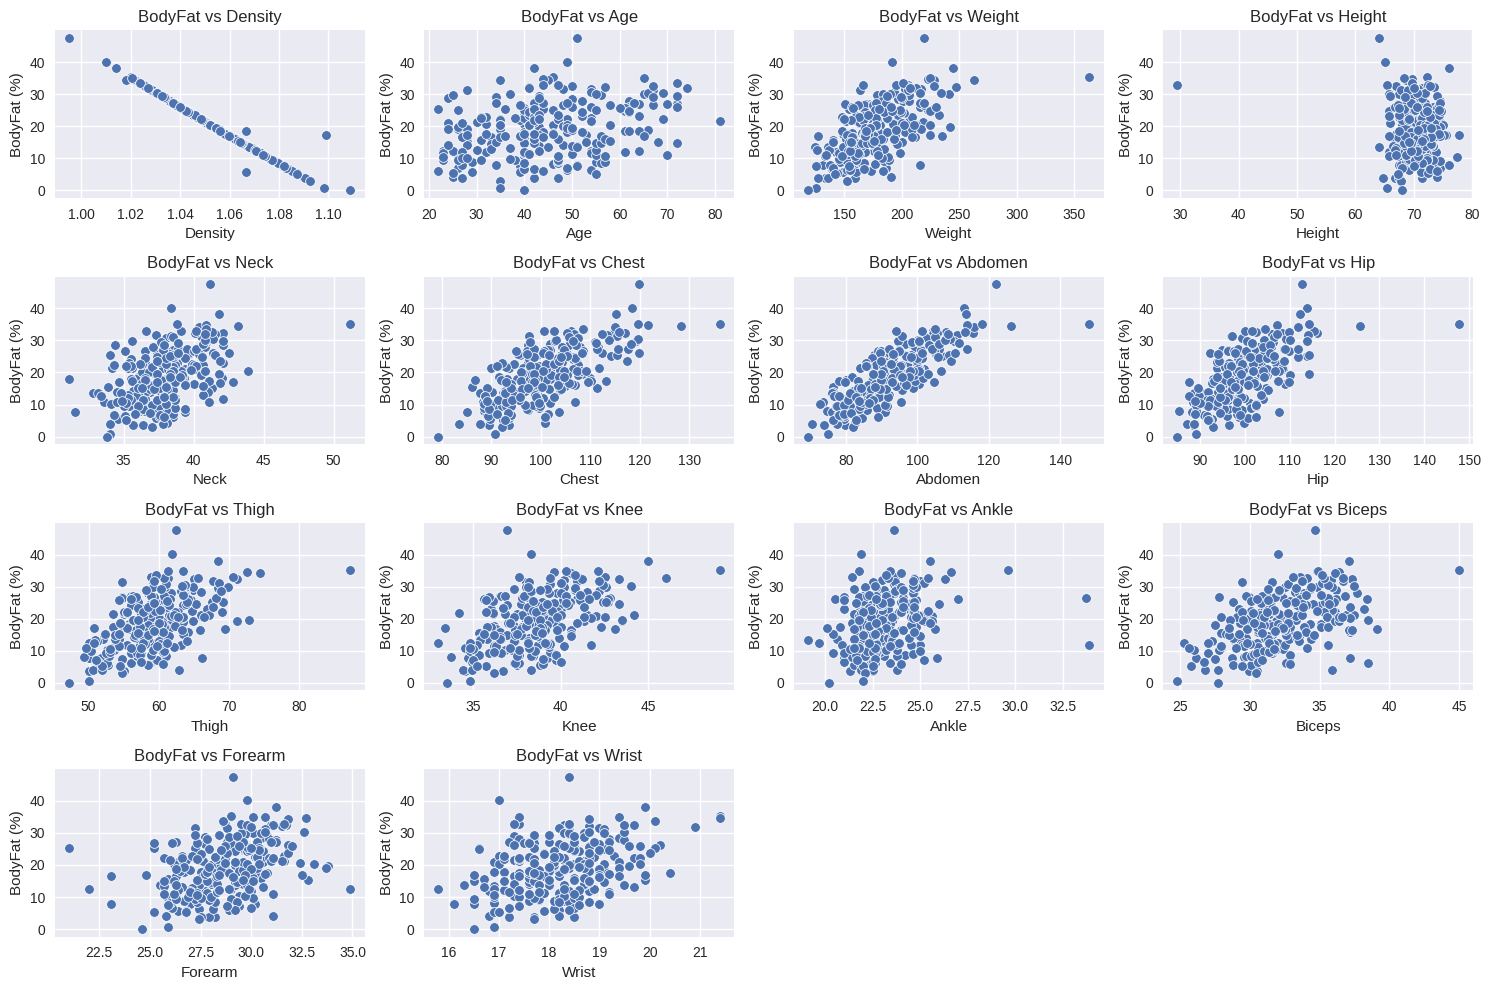

In [381]:
features = df.columns.drop('BodyFat')
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(x=df[feature], y=df['BodyFat'])
    plt.title(f'BodyFat vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('BodyFat (%)')
plt.tight_layout()
plt.show()

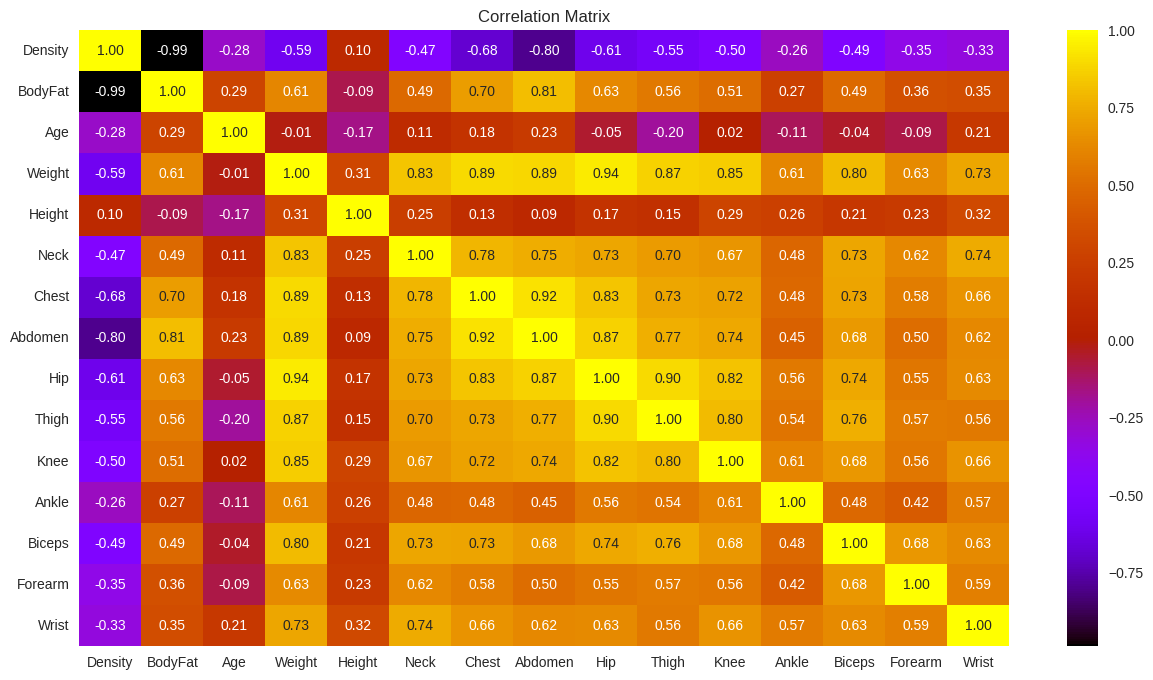

In [382]:
plt.figure(figsize=(15, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='gnuplot', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

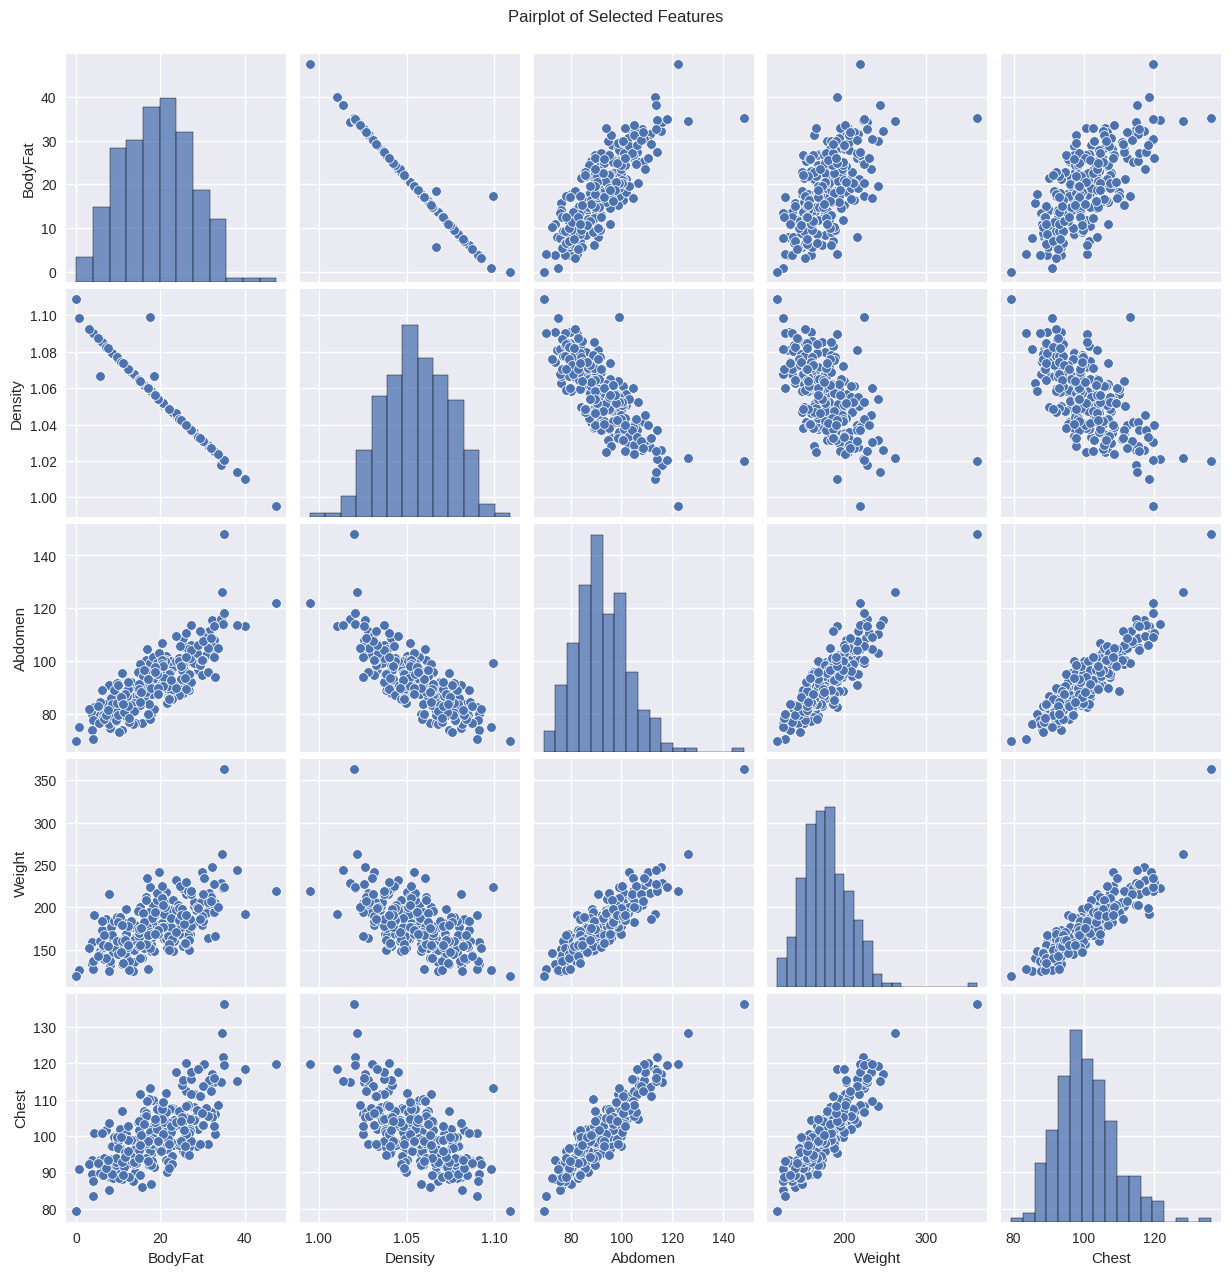

In [383]:
selected_features = ['BodyFat', 'Density', 'Abdomen', 'Weight', 'Chest']
sns.pairplot(df[selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

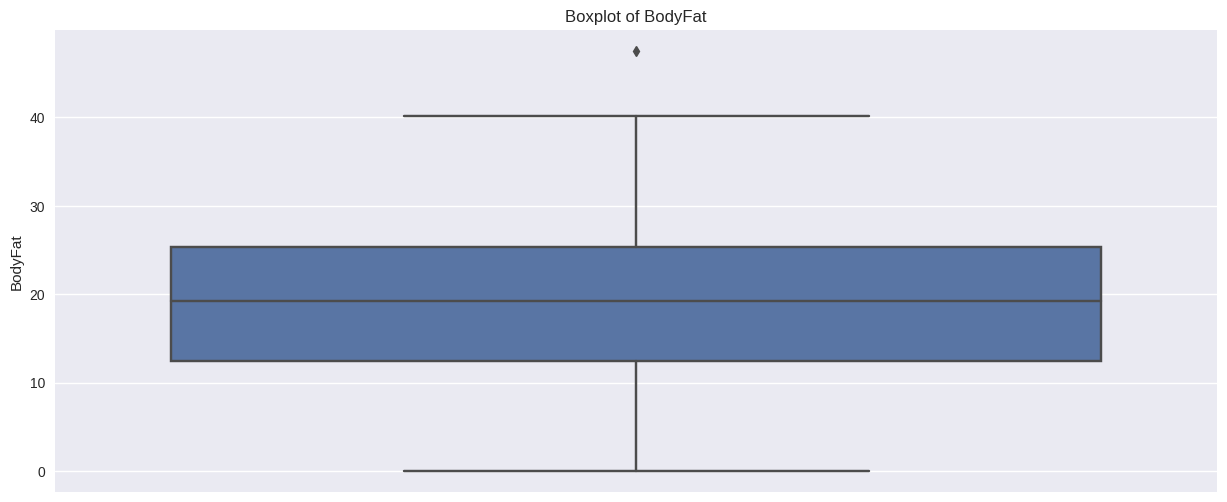

In [384]:
plt.figure(figsize=(15, 6))
sns.boxplot(y=df['BodyFat'])
plt.title('Boxplot of BodyFat')
plt.show()

In [385]:
Q1 = df['BodyFat'].quantile(0.25)
Q3 = df['BodyFat'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['BodyFat'] < Q1 - 1.5 * IQR) | (df['BodyFat'] > Q3 + 1.5 * IQR)]
outliers

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
215    0.995     47.5   51   219.0    64.0  41.2  119.8    122.1  112.8   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
215   62.5  36.9   23.6    34.7     29.1   18.4

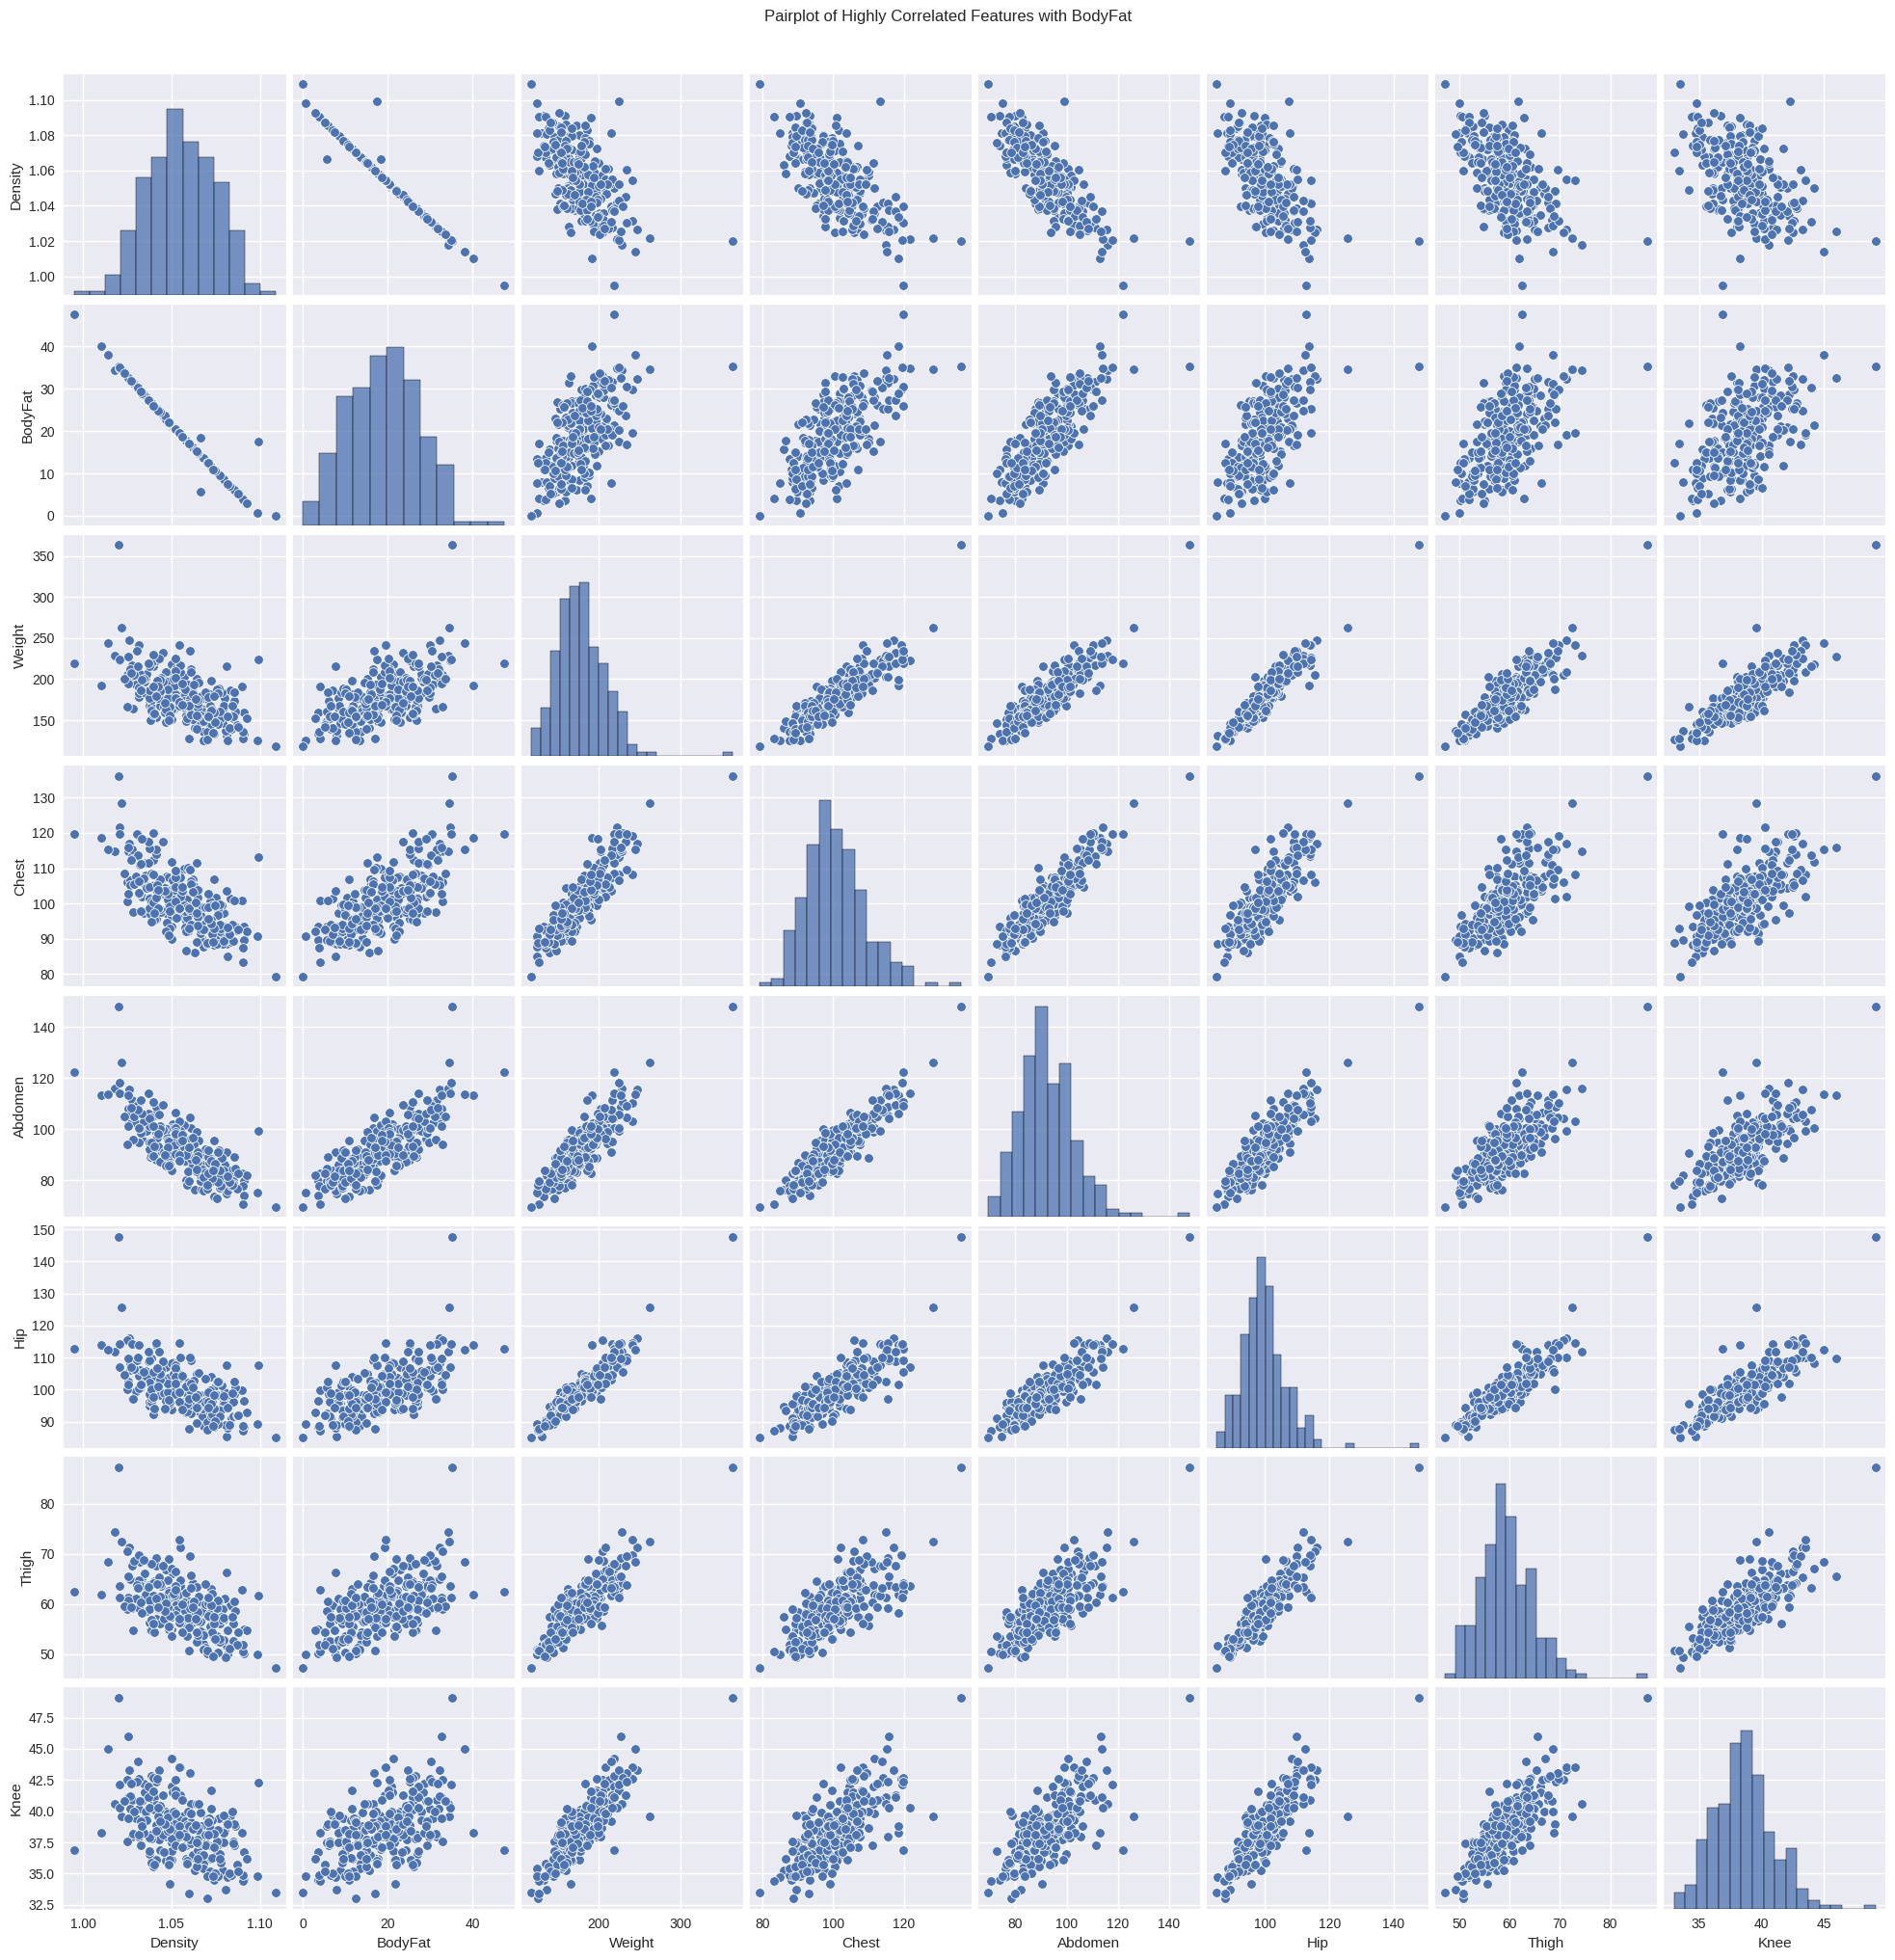

In [386]:
high_corr_features = corr['BodyFat'][abs(corr['BodyFat']) > 0.5].index
sns.pairplot(df[high_corr_features])
plt.suptitle('Pairplot of Highly Correlated Features with BodyFat', y=1.02)
plt.show()

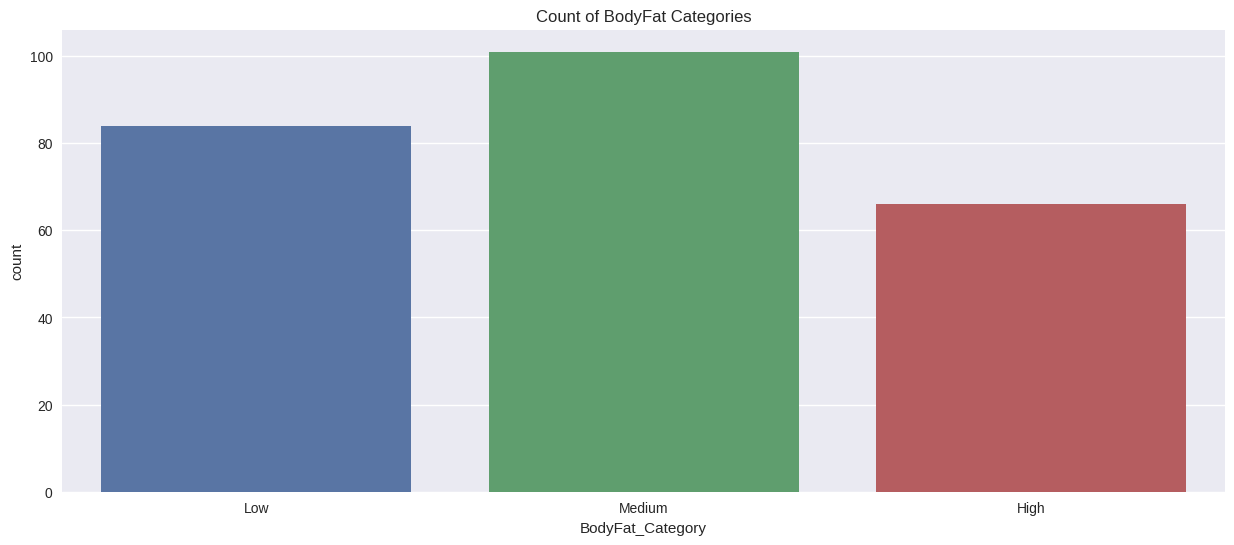

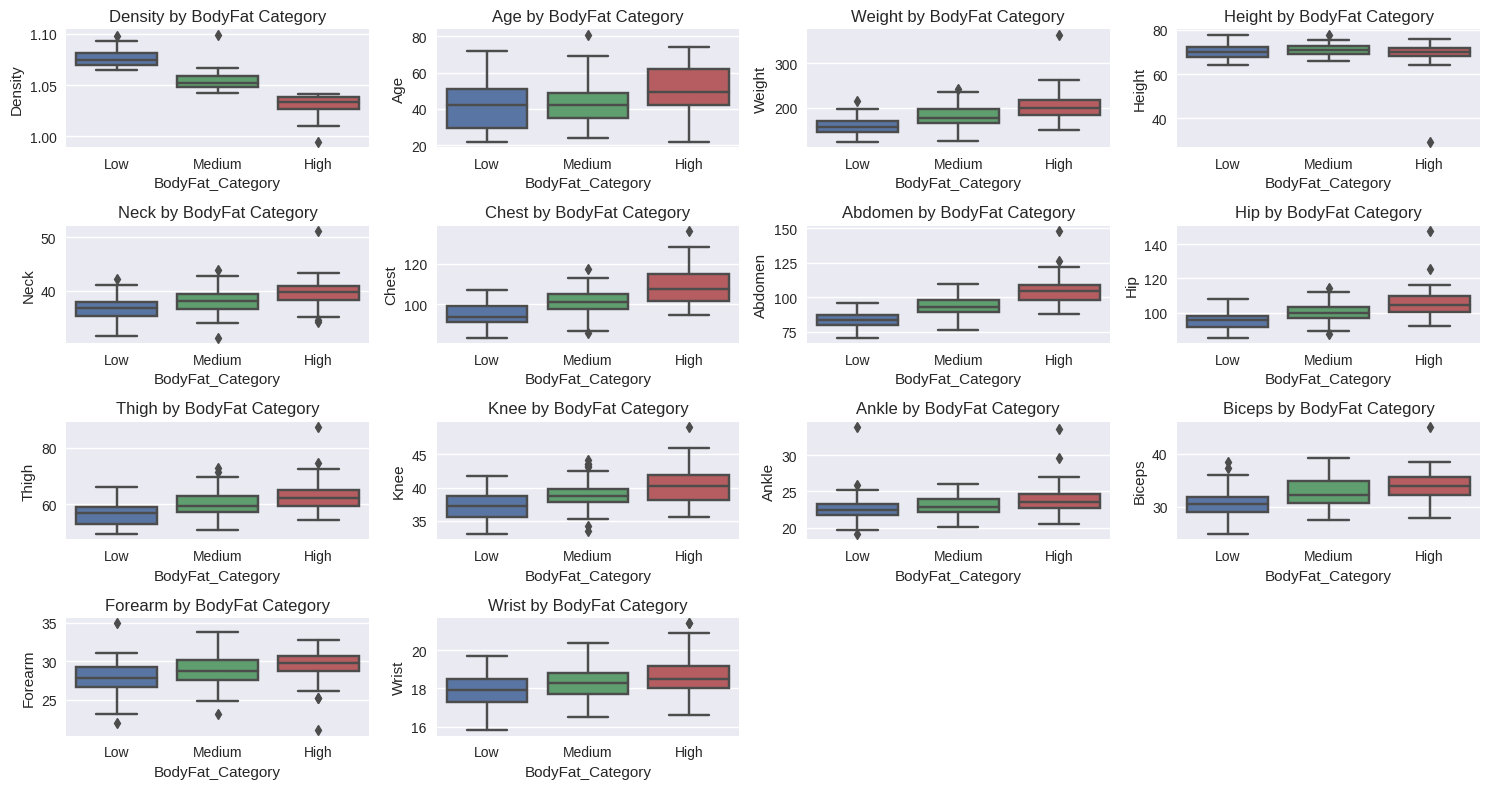

In [387]:
# Example: Discretize BodyFat
df['BodyFat_Category'] = pd.cut(df['BodyFat'], bins=[0, 15, 25, 100], labels=['Low', 'Medium', 'High'])

# Countplot for BodyFat categories
plt.figure(figsize=(15, 6))
sns.countplot(x='BodyFat_Category', data=df)
plt.title('Count of BodyFat Categories')
plt.show()

# Boxplot of features by BodyFat category
plt.figure(figsize=(15, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='BodyFat_Category', y=feature, data=df)
    plt.title(f'{feature} by BodyFat Category')
plt.tight_layout()
plt.show()

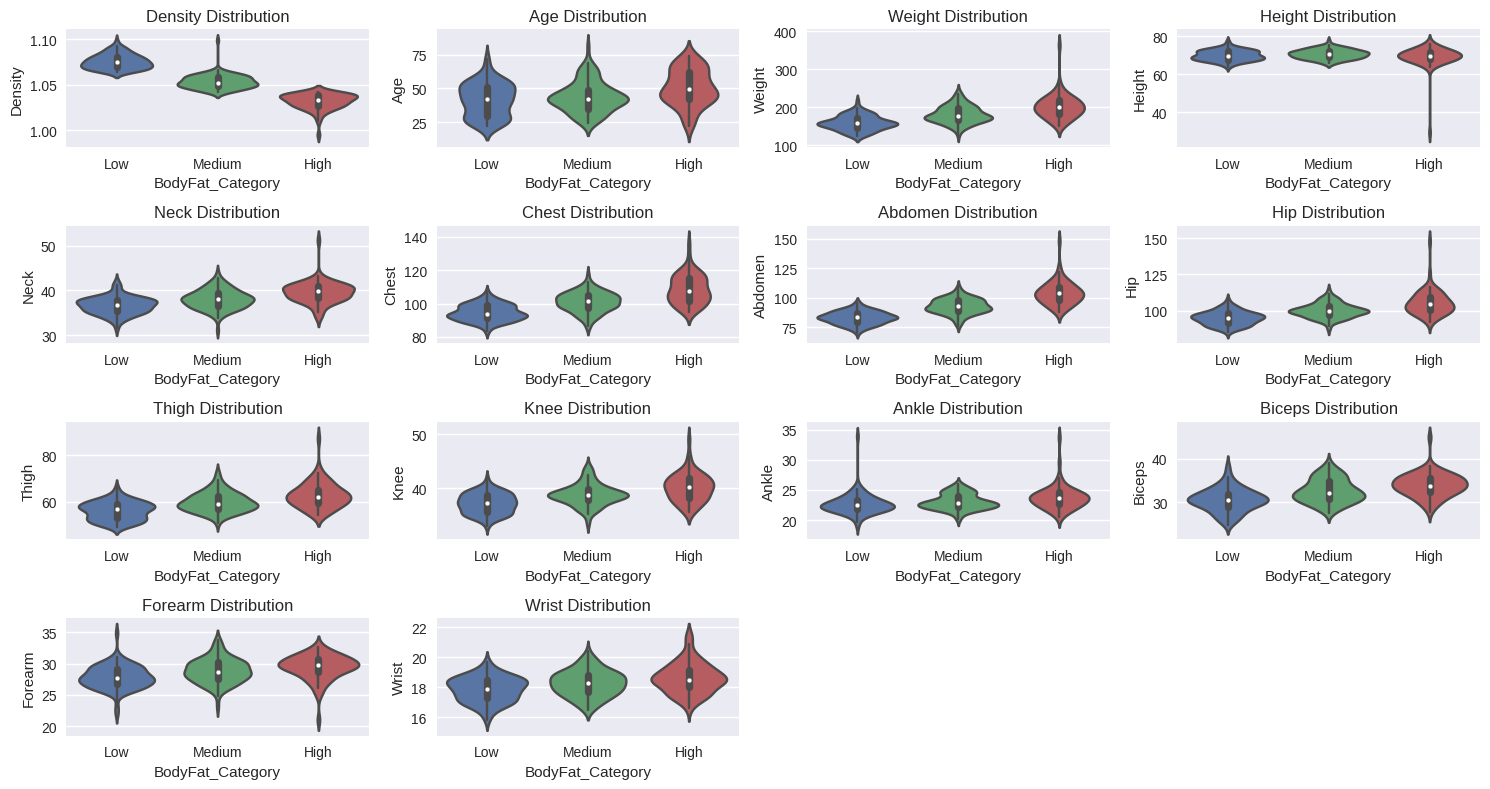

In [388]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 4, i)
    sns.violinplot(x='BodyFat_Category', y=feature, data=df)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

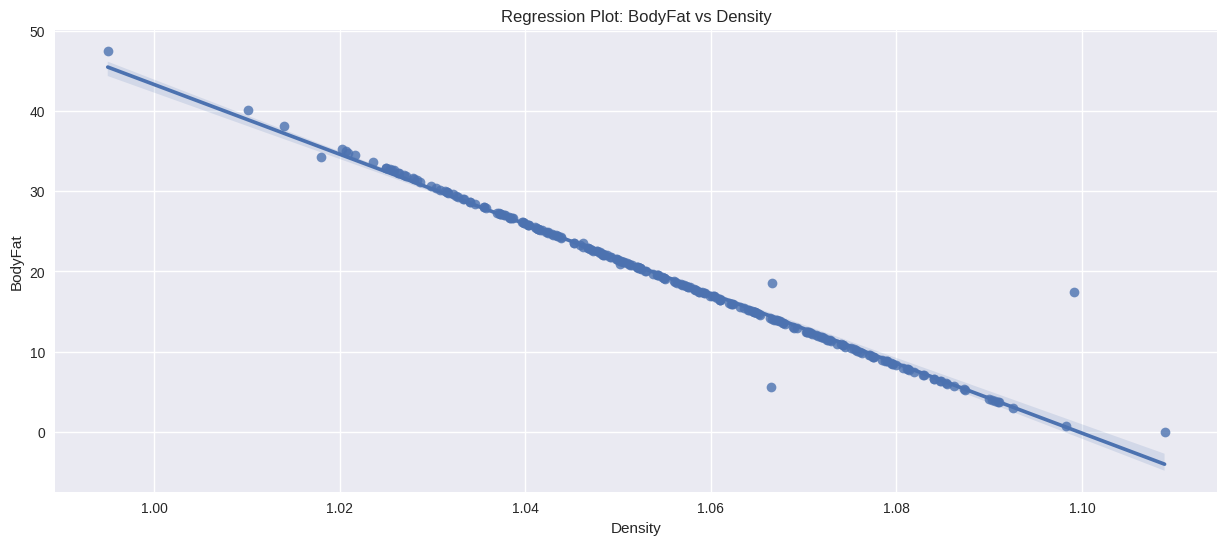

In [389]:
# Example with Density (likely highly correlated)
plt.figure(figsize=(15, 6))
sns.regplot(x='Density', y='BodyFat', data=df)
plt.title('Regression Plot: BodyFat vs Density')
plt.show()

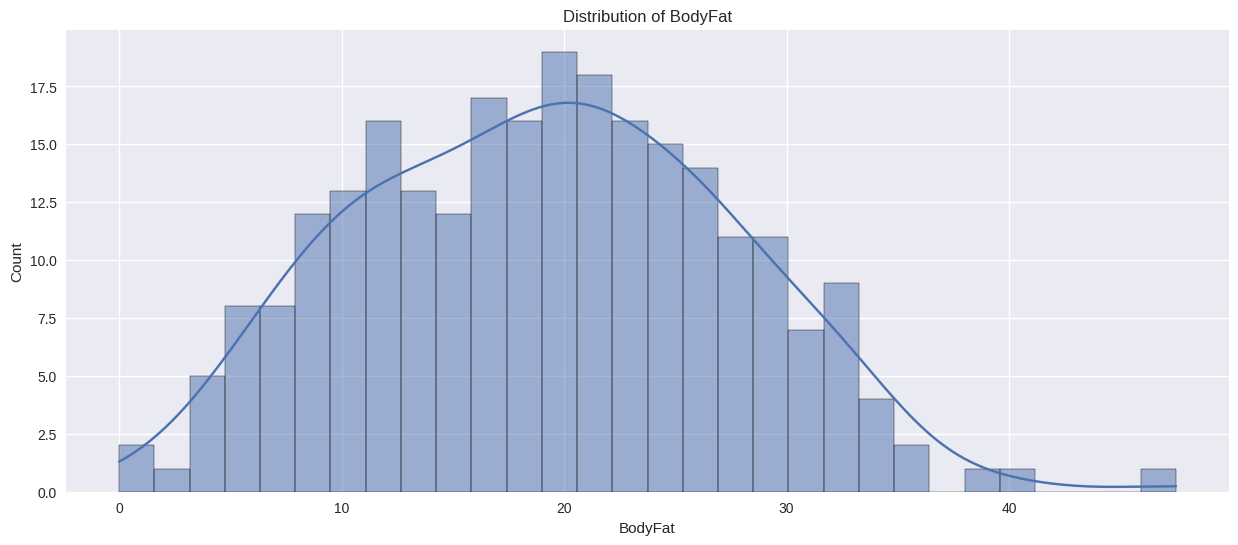

In [390]:
plt.figure(figsize=(15, 6))
sns.histplot(df['BodyFat'], kde=True, bins=30)
plt.title('Distribution of BodyFat')
plt.savefig('/kaggle/working/bodyfat_histogram.png')
plt.show()

In [391]:
df.drop(columns=["BodyFat_Category"],axis=1,inplace=True)

In [392]:
X = df.select_dtypes(include=['number']).drop(columns=['BodyFat'])  # Assuming BodyFat is the target
y = df['BodyFat']  # Target variable


In [393]:
def correlation(df, threshold):
    colcor = set()

    # Keep only numeric columns
    df_numeric = df.select_dtypes(include='number')

    cormat = df_numeric.corr()
    for i in range(len(cormat)):
        for j in range(i):
            if abs(cormat.iloc[i, j]) > threshold:
                colname = cormat.columns[i]
                colcor.add(colname)

    return colcor


ans=correlation(X,0.85)
ans

{'Abdomen', 'Chest', 'Hip', 'Knee', 'Thigh'}

            VIF   Column
7   2823.599196      Hip
0   2710.196700  Density
13  1339.993165    Wrist
5   1327.734644    Chest
9   1174.133421     Knee
4   1081.582064     Neck
8   1001.990668    Thigh
6    992.381183  Abdomen
2    927.258823   Weight
3    582.893107   Height
12   442.122445  Forearm
11   416.486099   Biceps
10   351.401683    Ankle
1     31.087967      Age


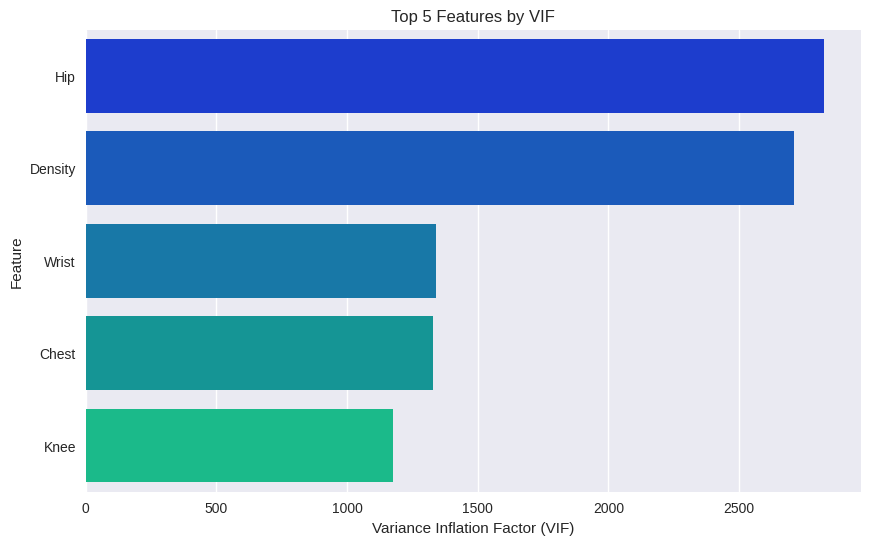

In [394]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

temp = df.select_dtypes(include=['float64', 'int64']).drop(columns=['BodyFat'])

# Calculate VIF for each feature
info = pd.DataFrame()
info["VIF"] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
info["Column"] = temp.columns

# Sort by VIF (descending) to identify top 5 features
info = info.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(info)

# Plot top 5 features by VIF
plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="Column", data=info.head(5), palette='winter')
plt.title('Top 5 Features by VIF')
plt.xlabel('Variance Inflation Factor (VIF)')
plt.ylabel('Feature')
plt.show()

Top 5 Important Features:
   Feature  Importance
0  Density    0.677646
6  Abdomen    0.188648
5    Chest    0.040774
2   Weight    0.029990
7      Hip    0.020279


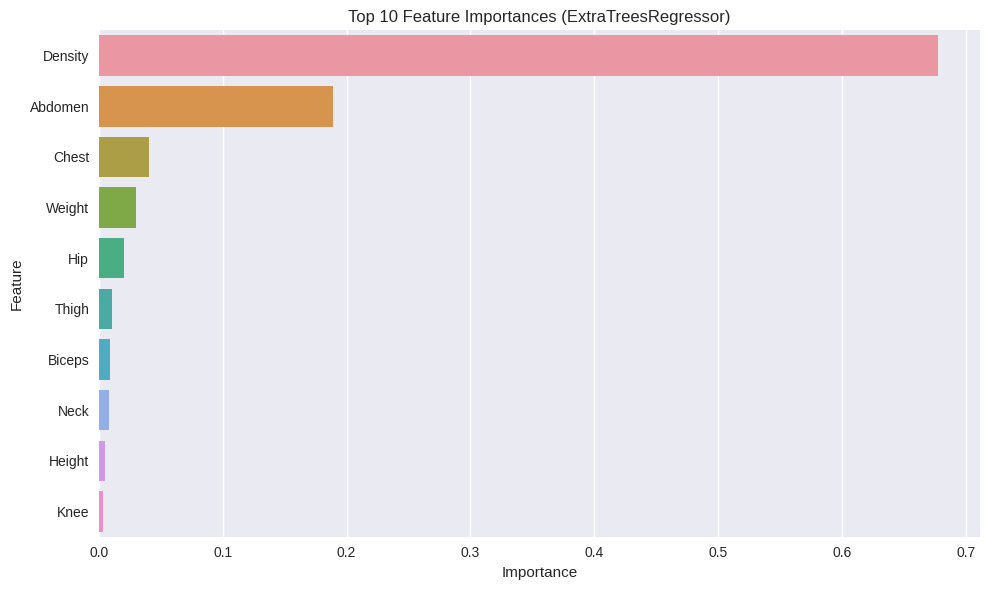

In [395]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

# Select only numerical columns
X = df.select_dtypes(include=['number']).drop(columns=['BodyFat'])  # Assuming BodyFat is the target
y = df['BodyFat']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top 5 important features
print("Top 5 Important Features:")
print(feature_importance_df.head(5))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances (ExtraTreesRegressor)')
plt.tight_layout()
plt.show()


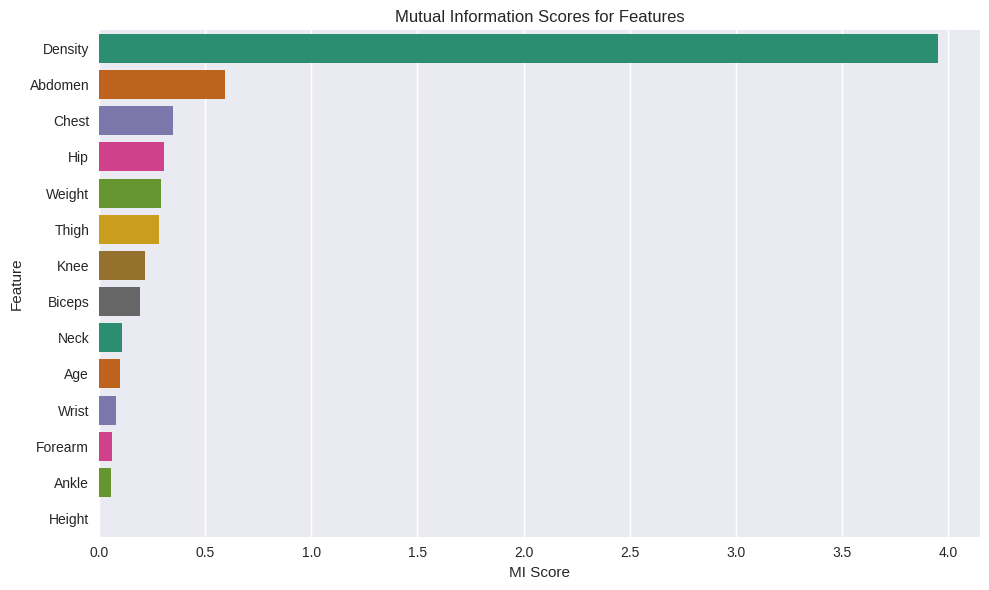

In [396]:
from sklearn.feature_selection import mutual_info_regression


# X = independent features (excluding 'BodyFat')
X = df.drop(columns=['BodyFat'])
y = df['BodyFat']

# Apply mutual information regression
mi_scores = mutual_info_regression(X, y, random_state=0)

# Put in DataFrame
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False).reset_index(drop=True)

# Plot Mutual Information Scores
plt.figure(figsize=(10, 6))
sns.barplot(data=mi_df, x='MI Score', y='Feature', palette='Dark2')

plt.title('Mutual Information Scores for Features')
plt.xlabel('MI Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [397]:
df=df[["Density","Abdomen","Chest","Hip","Weight","BodyFat"]]
df.head()

Density  Abdomen  Chest    Hip  Weight  BodyFat
0   1.0708     85.2   93.1   94.5  154.25     12.3
1   1.0853     83.0   93.6   98.7  173.25      6.1
2   1.0414     87.9   95.8   99.2  154.00     25.3
3   1.0751     86.4  101.8  101.2  184.75     10.4
4   1.0340    100.0   97.3  101.9  184.25     28.7

In [398]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
X = df.drop(columns=['BodyFat'])
y = df['BodyFat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [399]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 1.90
R² Score: 0.96


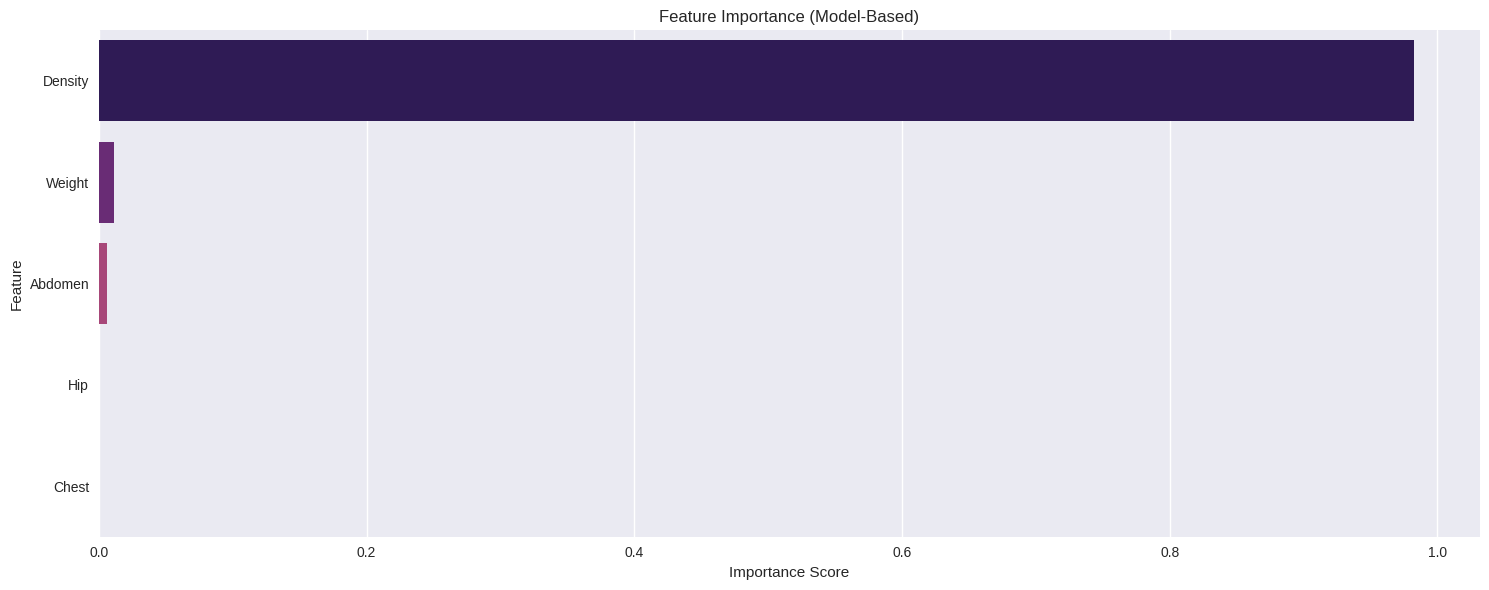

In [400]:
feature_importance = pd.DataFrame({'Feature': X.columns,'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='magma')

plt.title('Feature Importance (Model-Based)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

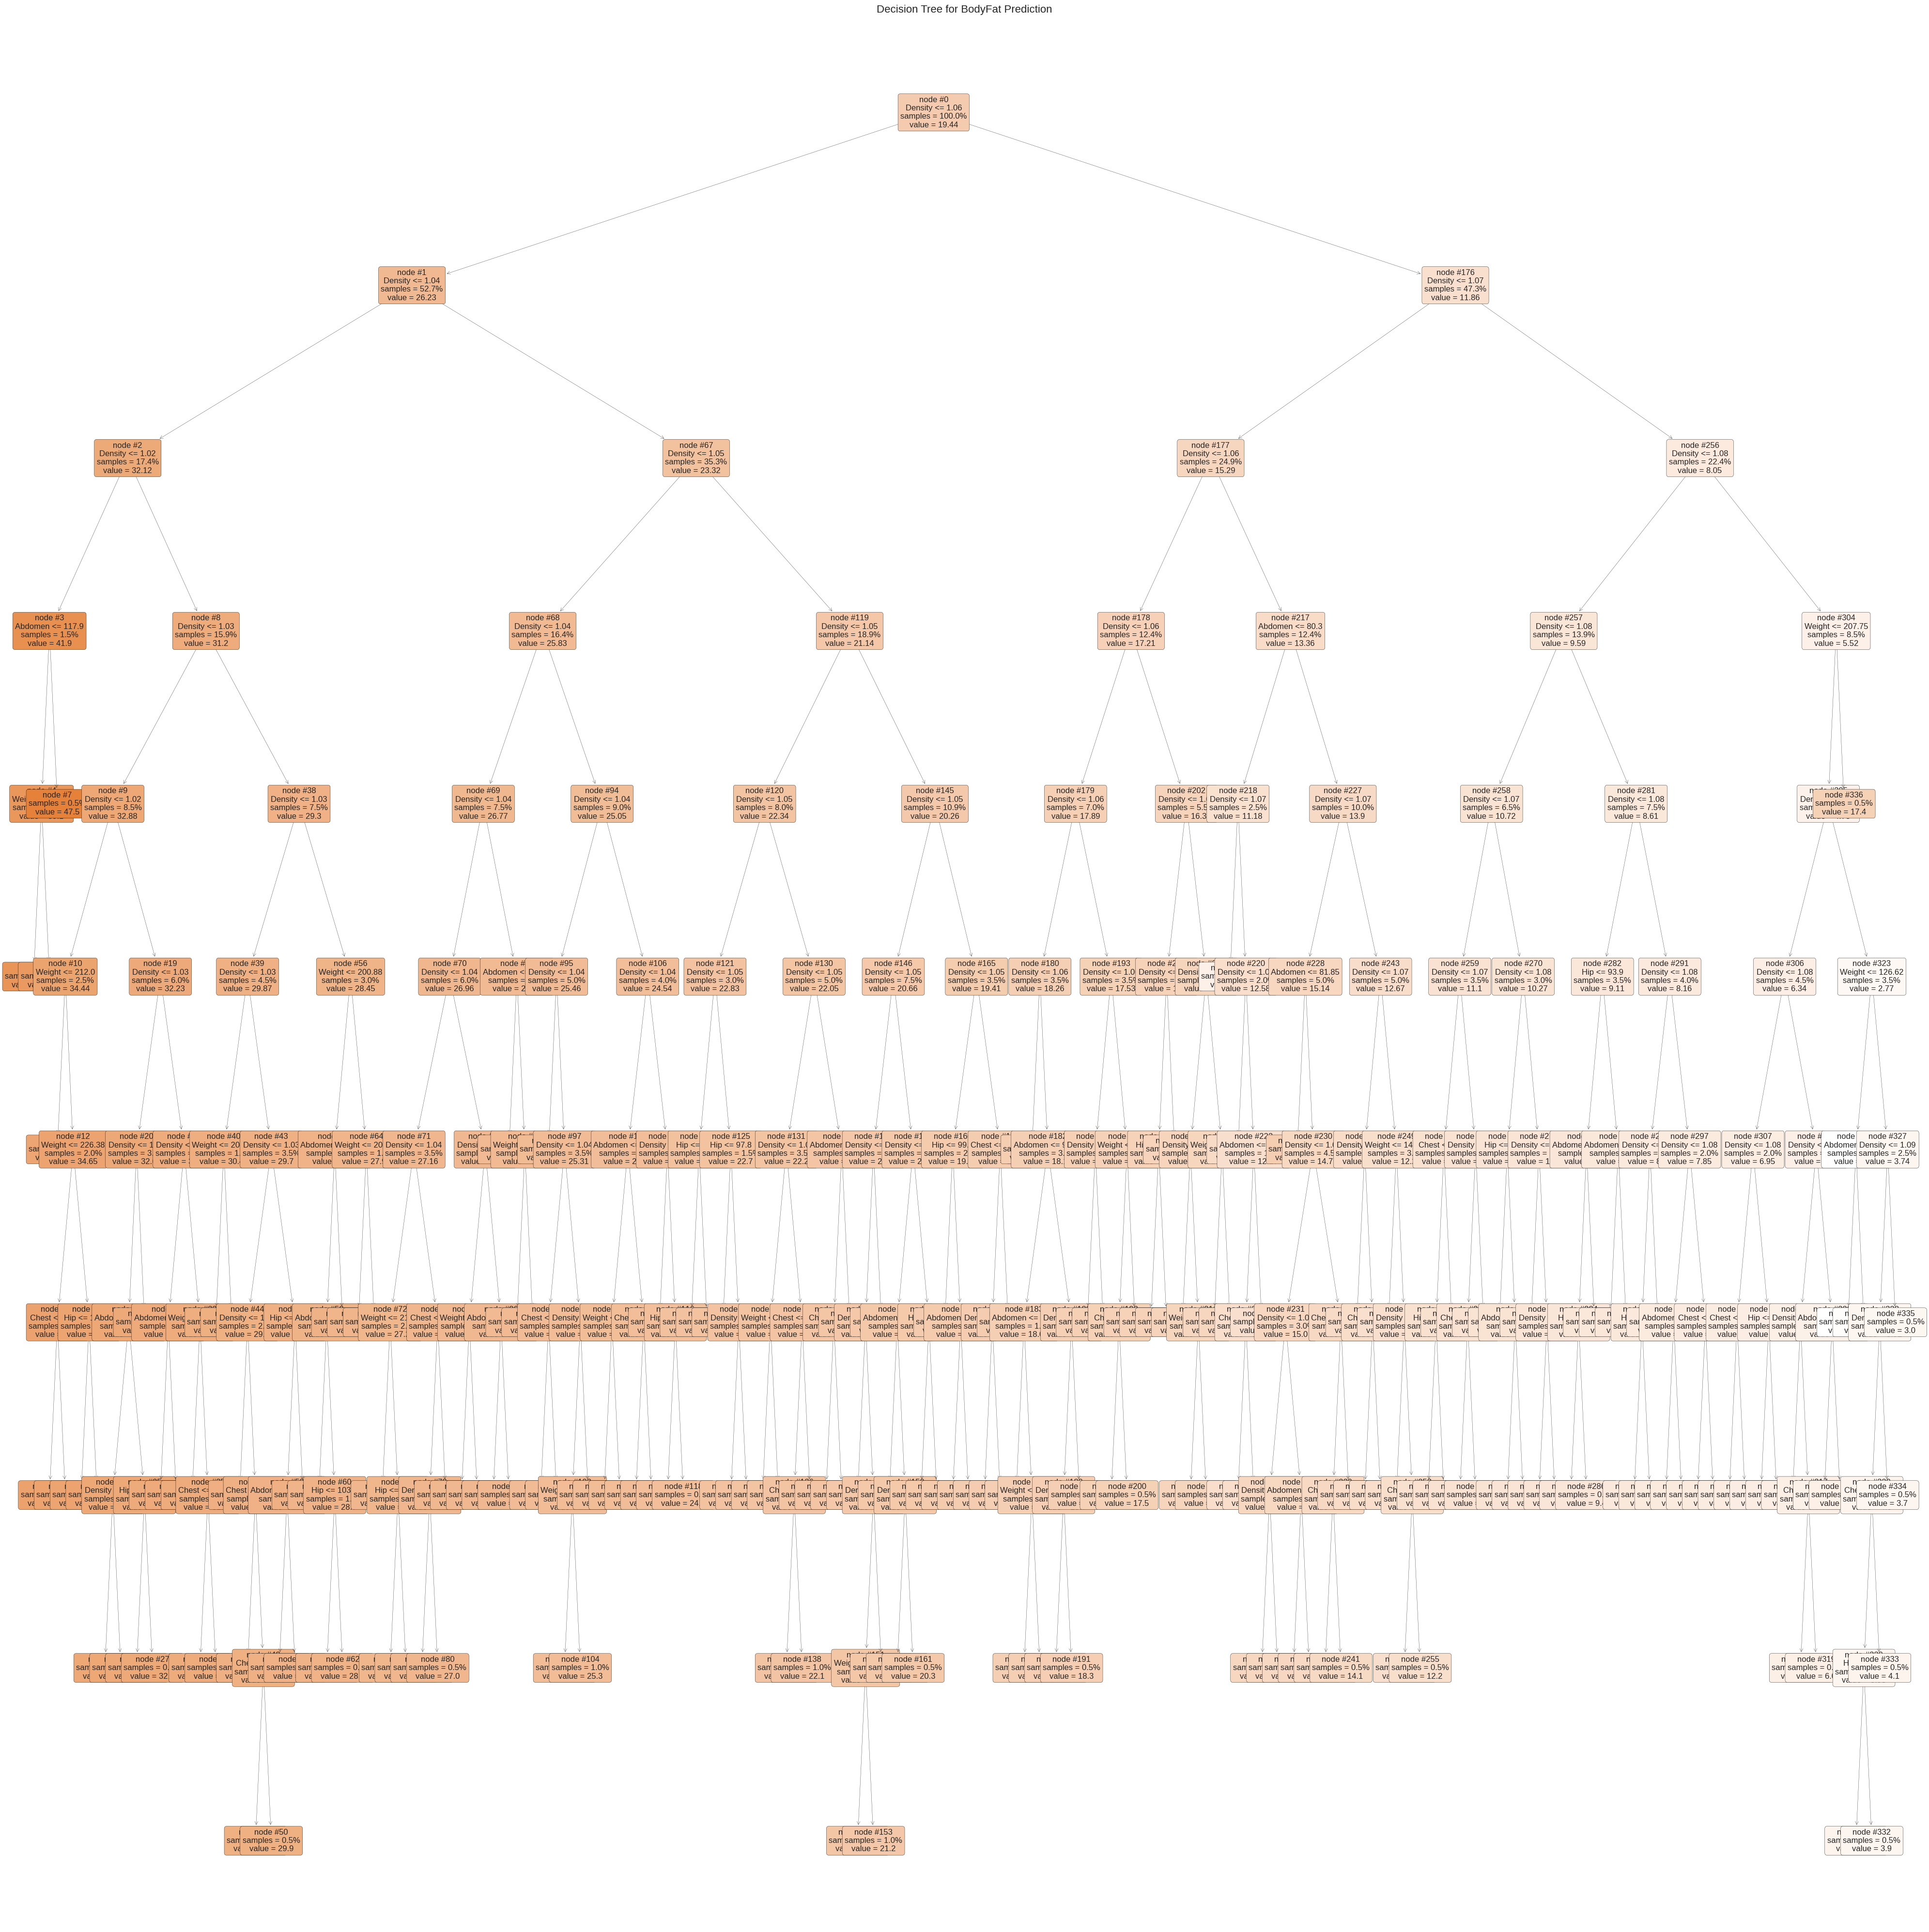

In [401]:
plt.figure(figsize=(40, 40))  # Large figure for clarity
from sklearn import tree
tree.plot_tree(
    model,
    feature_names=X.columns,
    filled=True,  # Color nodes based on value
    rounded=True,  # Rounded boxes for aesthetics
    fontsize=12,  # Readable font size
    impurity=False,  # Hide impurity for cleaner look
    node_ids=True,  # Show node IDs
    proportion=True,  # Show proportion of samples
    precision=2,  # Limit decimal places
    class_names=['BodyFat'],  # Label for regression output
    ax=plt.gca()  # Use current axes
)

# Customize the plot
plt.title('Decision Tree for BodyFat Prediction', fontsize=16, pad=20)
plt.xlabel('Feature Splits', fontsize=14)
plt.ylabel('Tree Depth', fontsize=14)
plt.style.use('seaborn')  # Apply seaborn style for aesthetics
plt.tight_layout()
plt.savefig('/kaggle/working/decision_tree_bodyfat.png', dpi=300, bbox_inches='tight')
plt.show()

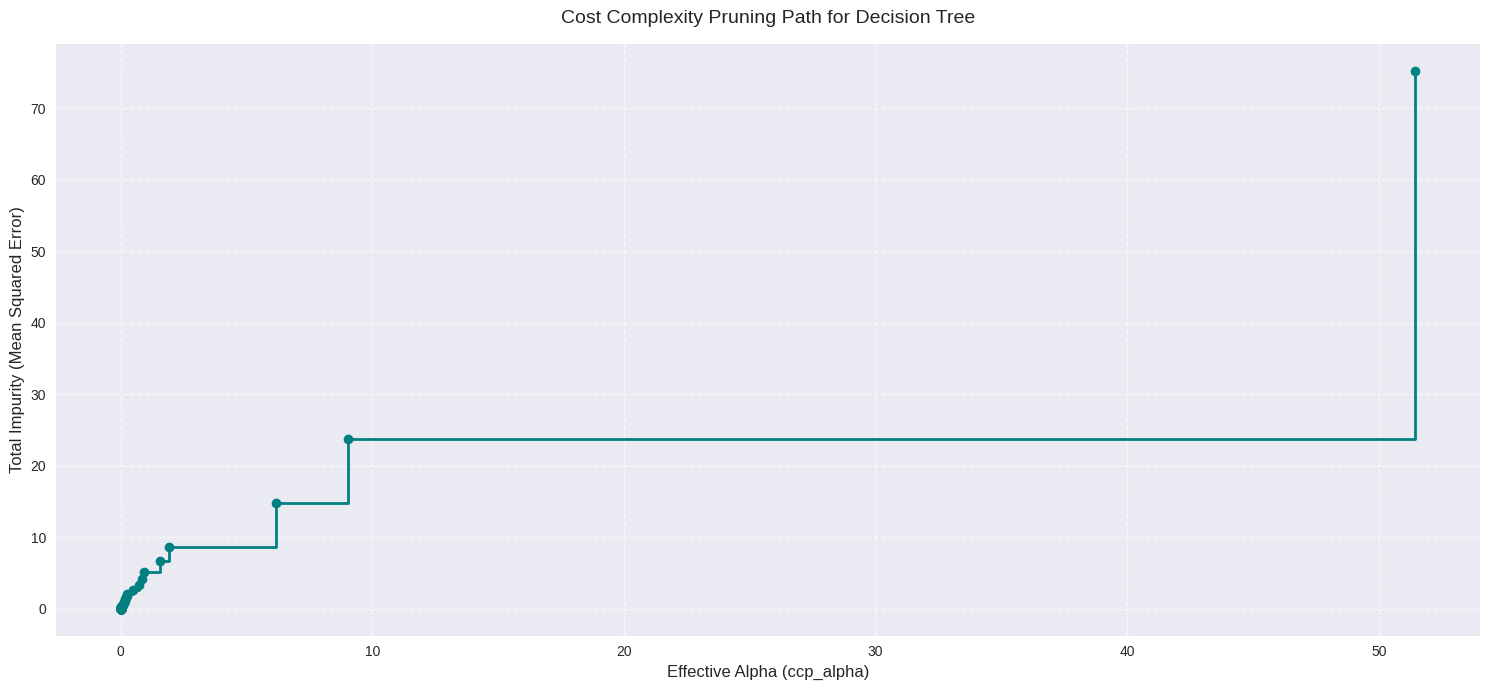

In [402]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # Effective alpha values
impurities = path.impurities   # Total impurity (MSE) at each alpha

# Plot the cost complexity pruning path
plt.figure(figsize=(15,7))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle='steps-post', color='teal', linewidth=2)
plt.xlabel('Effective Alpha (ccp_alpha)', fontsize=12)
plt.ylabel('Total Impurity (Mean Squared Error)', fontsize=12)
plt.title('Cost Complexity Pruning Path for Decision Tree', fontsize=14, pad=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.style.use('seaborn')
plt.tight_layout()

# Display the plot
plt.show()

In [403]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

# Test different ccp_alpha values
for alpha in ccp_alphas[::len(ccp_alphas)//5]:  # Test 5 evenly spaced alphas
    pruned_model = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    pruned_model.fit(X_train, y_train)
    y_pred = pruned_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"ccp_alpha={alpha:.4f}, MSE={mse:.2f}, R²={r2:.2f}")

ccp_alpha=0.0000, MSE=1.90, R²=0.96
ccp_alpha=0.0000, MSE=1.90, R²=0.96
ccp_alpha=0.0001, MSE=1.90, R²=0.96
ccp_alpha=0.0006, MSE=1.91, R²=0.96
ccp_alpha=0.0049, MSE=1.97, R²=0.96
ccp_alpha=6.1677, MSE=11.80, R²=0.75


In [404]:
optimal_alpha = 0.0049
pruned_model = DecisionTreeRegressor(ccp_alpha=optimal_alpha, random_state=42)
pruned_model.fit(X_train, y_train)

# Evaluate the model
y_pred = pruned_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Pruned Model (ccp_alpha={optimal_alpha}):")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Pruned Model (ccp_alpha=0.0049):
Mean Squared Error: 1.97
R² Score: 0.96


In [405]:
dt_param_grid = {
    'max_depth': [None, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'ccp_alpha': np.logspace(-4, 1, 10)  # Range from 0.0001 to 10
}

dt = DecisionTreeRegressor(random_state=42)

# Set up RandomizedSearchCV
dt_random = RandomizedSearchCV(
    estimator=dt,
    param_distributions=dt_param_grid,
    n_iter=50,  # Number of parameter combinations
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,  # Use all available cores (GPU-accelerated parallelization)
    verbose=1  # Show progress
)

dt_random.fit(X_train, y_train)

# Best parameters and score
print("Decision Tree - Best Parameters:", dt_random.best_params_)
print("Decision Tree - Best CV MSE:", dt_random.best_score_)

# Evaluate on test set
dt_best = dt_random.best_estimator_
y_pred_dt = dt_best.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)
print(f"Decision Tree - Test MSE: {dt_mse:.2f}")
print(f"Decision Tree - Test R²: {dt_r2:.2f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Decision Tree - Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20, 'ccp_alpha': 9.999999999999999e-05}
Decision Tree - Best CV MSE: -3.1659257277016164
Decision Tree - Test MSE: 0.76
Decision Tree - Test R²: 0.98


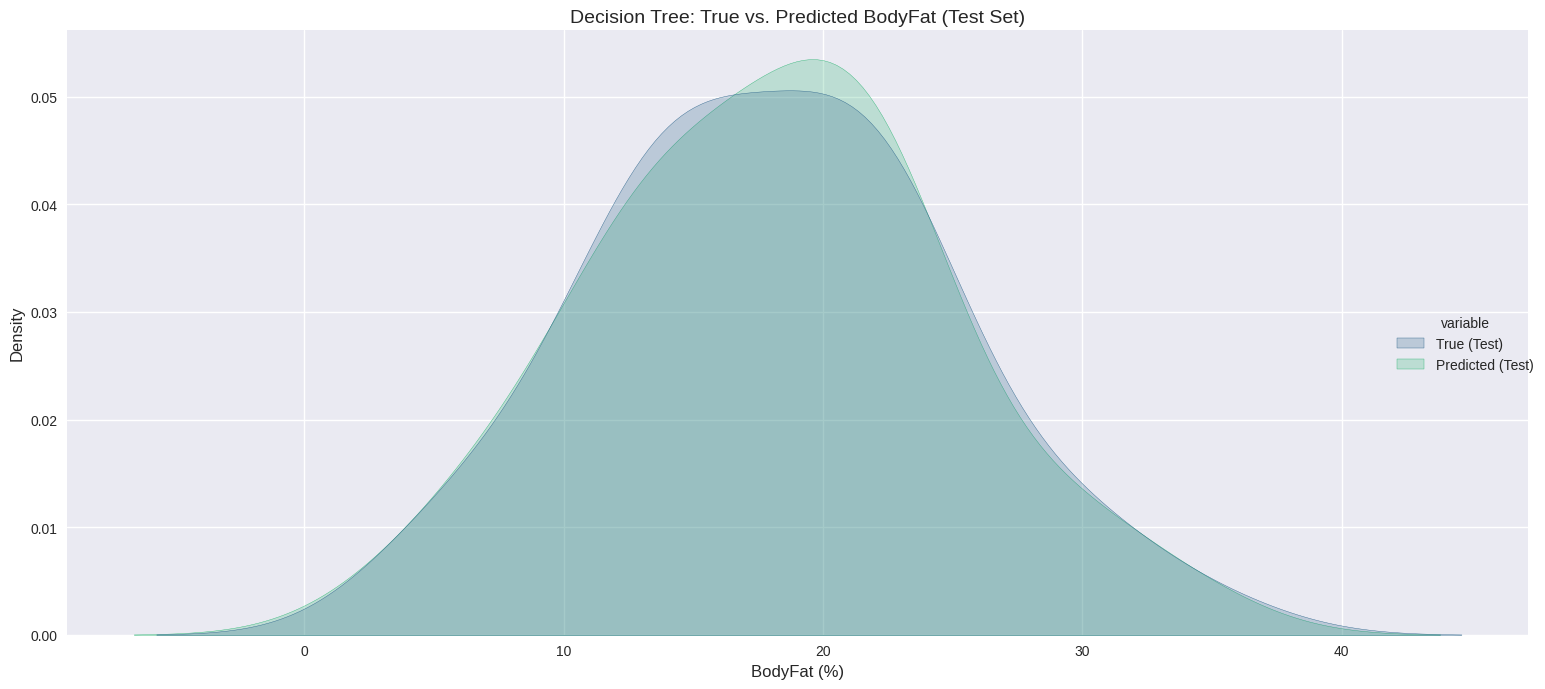

In [406]:
sns.displot(data=pd.DataFrame({'True (Test)': y_test,'Predicted (Test)': y_pred_dt}).melt(value_vars=
                                                                    ['True (Test)', 'Predicted (Test)']),x='value',hue='variable',
    kind='kde',
    fill=True,
    palette='viridis',
    common_norm=False,height=7,aspect=2)

plt.title('Decision Tree: True vs. Predicted BodyFat (Test Set)', fontsize=14)
plt.xlabel('BodyFat (%)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()

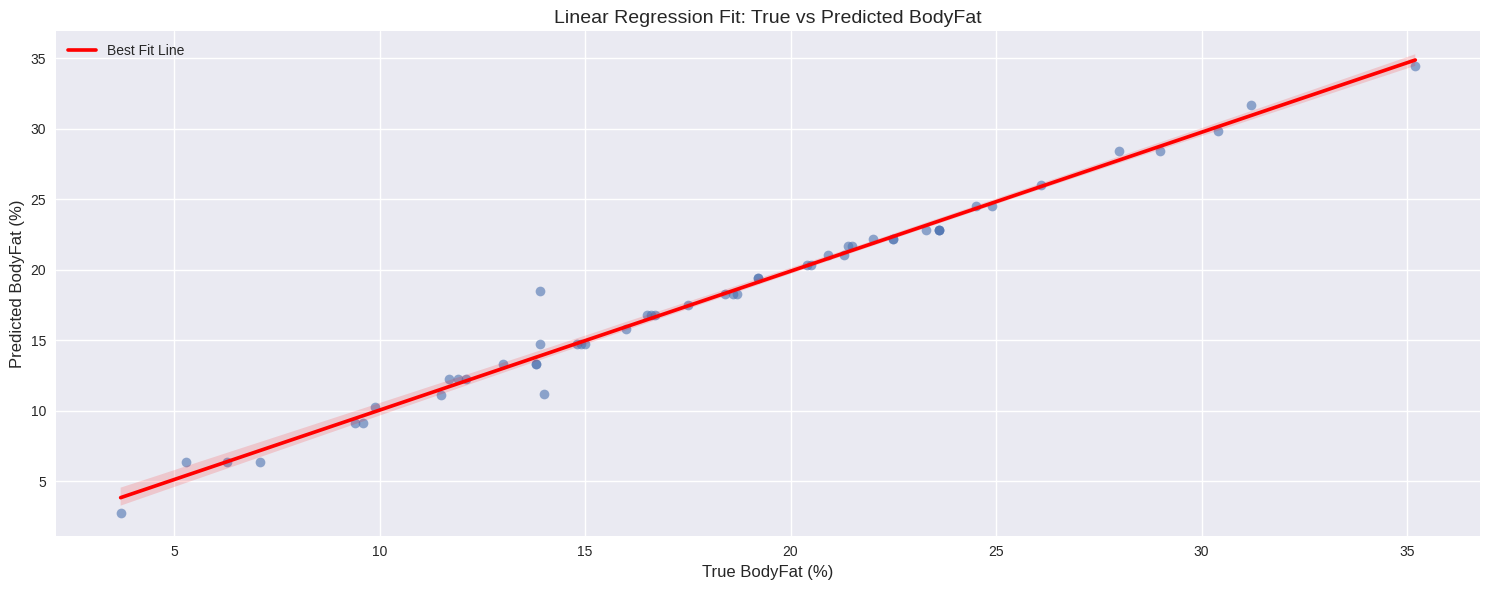

In [407]:
df_compare = pd.DataFrame({
    'True BodyFat (%)': y_test.values,
    'Predicted BodyFat (%)': y_pred_dt
})

# Plot: Scatter with Regression Line
plt.figure(figsize=(15, 6))
sns.regplot(data=df_compare,
            x='True BodyFat (%)',
            y='Predicted BodyFat (%)',
            line_kws={'color': 'red', 'label': 'Best Fit Line'},
            scatter_kws={'alpha': 0.6, 'label': 'Predictions'})

# Labels & Title
plt.title('Linear Regression Fit: True vs Predicted BodyFat', fontsize=14)
plt.xlabel('True BodyFat (%)', fontsize=12)
plt.ylabel('Predicted BodyFat (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [408]:
import pickle

f = open('decision_tree_model.pkl', 'wb')
pickle.dump(dt_best, f)
f.close()

In [409]:
from sklearn.ensemble import RandomForestRegressor
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 0.33]
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    n_iter=50,  # Number of parameter combinations
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,  # Use all available cores (GPU-accelerated)
    verbose=1  # Show progress
)

# Fit RandomizedSearchCV
rf_random.fit(X_train, y_train)

# Best parameters and score
print("\nRandom Forest - Best Parameters:", rf_random.best_params_)
print("Random Forest - Best CV MSE:", -rf_random.best_score_)

# Evaluate on test set
rf_best = rf_random.best_estimator_
y_pred_rf = rf_best.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest - Test MSE: {rf_mse:.2f}")
print(f"Random Forest - Test R²: {rf_r2:.2f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors


Random Forest - Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10}
Random Forest - Best CV MSE: 2.589995284559482
Random Forest - Test MSE: 0.13
Random Forest - Test R²: 1.00


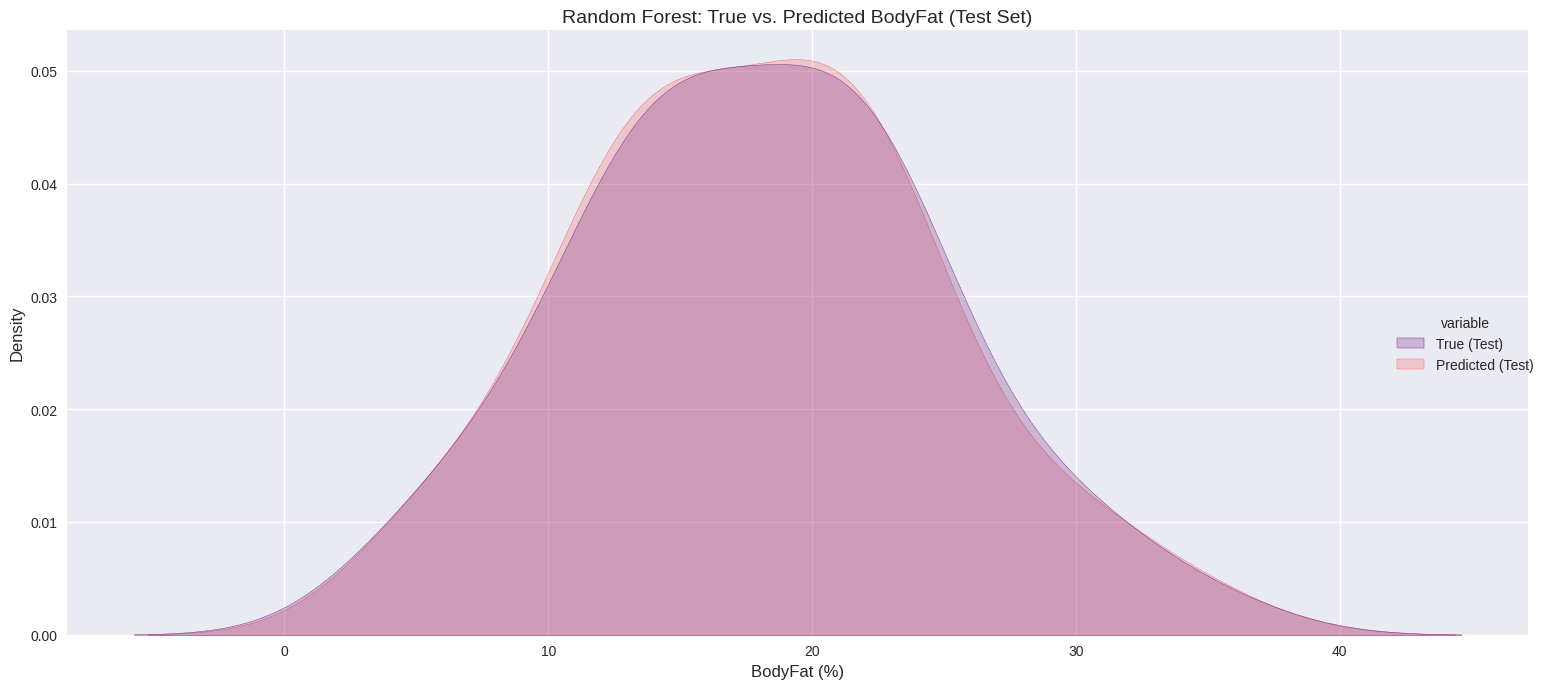

In [410]:
sns.displot(
    data=pd.DataFrame({
        'True (Test)': y_test,
        'Predicted (Test)': y_pred_rf
    }).melt(value_vars=['True (Test)', 'Predicted (Test)']),
    x='value',
    hue='variable',
    kind='kde',
    fill=True,
    palette='magma',
    common_norm=False,height=7,aspect=2
)
plt.title('Random Forest: True vs. Predicted BodyFat (Test Set)', fontsize=14)
plt.xlabel('BodyFat (%)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()

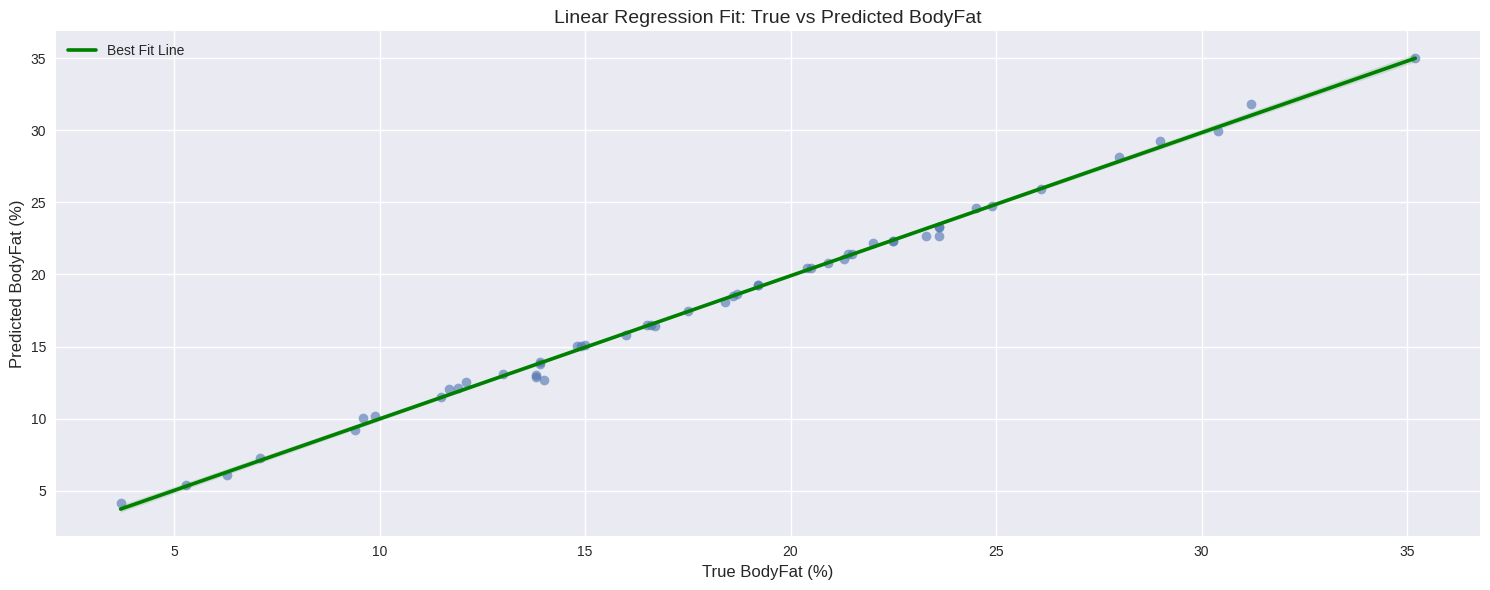

In [411]:
df_compare = pd.DataFrame({
    'True BodyFat (%)': y_test.values,
    'Predicted BodyFat (%)': y_pred_rf
})

# Plot: Scatter with Regression Line
plt.figure(figsize=(15, 6))
sns.regplot(data=df_compare,
            x='True BodyFat (%)',
            y='Predicted BodyFat (%)',
            line_kws={'color': 'green', 'label': 'Best Fit Line'},
            scatter_kws={'alpha': 0.6, 'label': 'Predictions'})

# Labels & Title
plt.title('Linear Regression Fit: True vs Predicted BodyFat', fontsize=14)
plt.xlabel('True BodyFat (%)', fontsize=12)
plt.ylabel('Predicted BodyFat (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [412]:
! pip freeze

absl-py==1.4.0
accelerate==1.5.2
aiofiles==22.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.18
aiosignal==1.3.2
aiosqlite==0.21.0
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
alembic==1.15.2
altair==5.5.0
annotated-types==0.7.0
annoy==1.17.3
ansicolors==1.1.8
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
args==0.1.0
array_record==0.7.1
arrow==1.3.0
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.3.31.0.36.18
asttokens==3.0.0
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
bayesian-optimization==2.0.3
beartype==0.20.2
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.42.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.2.1
blobfile==3.0.0
blosc2==3.2.1
bokeh==3.6.3
Boruta==0.4.3
boto3==1.38.11
botocore==1.38.11
Bottleneck==1.4.2
-e git+https://github.com/SohierDane/BigQuery_Helper@8615a7f6c1663e7f2d48aa2b32c2dbcb600a440f#egg=bq_helper